# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 650


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]-273.15
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | la palma
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | vaitape
Processing Record 4 of Set 1 | tanabe
Processing Record 5 of Set 1 | pangnirtung
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | champerico
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | tagusao
Processing Record 12 of Set 1 | mayumba
Processing Record 13 of Set 1 | kavieng
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | ciudad ojeda
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | balgazyn
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | pochutla
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | bilma
Processing Record 22 of Set 1 | port alfred
Processing Record 23 of Set 1 | klaksvik
Pr

Processing Record 35 of Set 4 | margate
Processing Record 36 of Set 4 | halalo
City not found. Skipping...
Processing Record 37 of Set 4 | xining
Processing Record 38 of Set 4 | atasu
Processing Record 39 of Set 4 | pisco
Processing Record 40 of Set 4 | hobart
Processing Record 41 of Set 4 | macau
Processing Record 42 of Set 4 | benjamin constant
Processing Record 43 of Set 4 | mahaicony
City not found. Skipping...
Processing Record 44 of Set 4 | salym
Processing Record 45 of Set 4 | dikson
Processing Record 46 of Set 4 | port lincoln
Processing Record 47 of Set 4 | quimper
Processing Record 48 of Set 4 | pevek
Processing Record 49 of Set 4 | sinnamary
Processing Record 0 of Set 5 | bonfim
Processing Record 1 of Set 5 | immenstadt
Processing Record 2 of Set 5 | zaozerne
Processing Record 3 of Set 5 | yumen
Processing Record 4 of Set 5 | malakal
Processing Record 5 of Set 5 | kudahuvadhoo
Processing Record 6 of Set 5 | tazovskiy
Processing Record 7 of Set 5 | srednekolymsk
Processing Re

Processing Record 21 of Set 8 | banepa
Processing Record 22 of Set 8 | nanortalik
Processing Record 23 of Set 8 | changtu
Processing Record 24 of Set 8 | xadani
City not found. Skipping...
Processing Record 25 of Set 8 | altay
Processing Record 26 of Set 8 | la asuncion
Processing Record 27 of Set 8 | oltu
Processing Record 28 of Set 8 | tarudant
City not found. Skipping...
Processing Record 29 of Set 8 | college
Processing Record 30 of Set 8 | mount isa
Processing Record 31 of Set 8 | puerto suarez
Processing Record 32 of Set 8 | cabedelo
Processing Record 33 of Set 8 | ancud
Processing Record 34 of Set 8 | myre
Processing Record 35 of Set 8 | asfi
Processing Record 36 of Set 8 | mehamn
Processing Record 37 of Set 8 | kosh-agach
Processing Record 38 of Set 8 | homer
Processing Record 39 of Set 8 | emba
Processing Record 40 of Set 8 | asti
Processing Record 41 of Set 8 | general roca
Processing Record 42 of Set 8 | adrar
Processing Record 43 of Set 8 | lompoc
Processing Record 44 of Se

Processing Record 8 of Set 12 | isilkul
Processing Record 9 of Set 12 | iskateley
Processing Record 10 of Set 12 | saint-pierre
Processing Record 11 of Set 12 | kashi
Processing Record 12 of Set 12 | zadar
Processing Record 13 of Set 12 | lavras
Processing Record 14 of Set 12 | yar-sale
Processing Record 15 of Set 12 | progreso
Processing Record 16 of Set 12 | muriti
Processing Record 17 of Set 12 | bay saint louis
Processing Record 18 of Set 12 | emerald
Processing Record 19 of Set 12 | labuhan
Processing Record 20 of Set 12 | bushenyi
Processing Record 21 of Set 12 | melilla
Processing Record 22 of Set 12 | aykhal
Processing Record 23 of Set 12 | buqayq
City not found. Skipping...
Processing Record 24 of Set 12 | san pedro
Processing Record 25 of Set 12 | bandarbeyla
Processing Record 26 of Set 12 | omutinskoye
City not found. Skipping...
Processing Record 27 of Set 12 | ambalavao
Processing Record 28 of Set 12 | kirkland
Processing Record 29 of Set 12 | yelizovo
Processing Record 30

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,la palma,33.8464,-118.0467,18.73,69,100,1.54,US,1670015459
1,avarua,-21.2078,-159.7750,28.03,78,40,4.12,CK,1670015460
2,vaitape,-16.5167,-151.7500,26.86,77,43,8.05,PF,1670015460
3,tanabe,33.7333,135.3667,5.95,71,0,1.65,JP,1670015461
4,pangnirtung,66.1451,-65.7125,-8.00,86,100,6.17,CA,1670015461


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la palma,33.8464,-118.0467,18.73,69,100,1.54,US,1670015459
1,avarua,-21.2078,-159.7750,28.03,78,40,4.12,CK,1670015460
2,vaitape,-16.5167,-151.7500,26.86,77,43,8.05,PF,1670015460
3,tanabe,33.7333,135.3667,5.95,71,0,1.65,JP,1670015461
4,pangnirtung,66.1451,-65.7125,-8.00,86,100,6.17,CA,1670015461


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

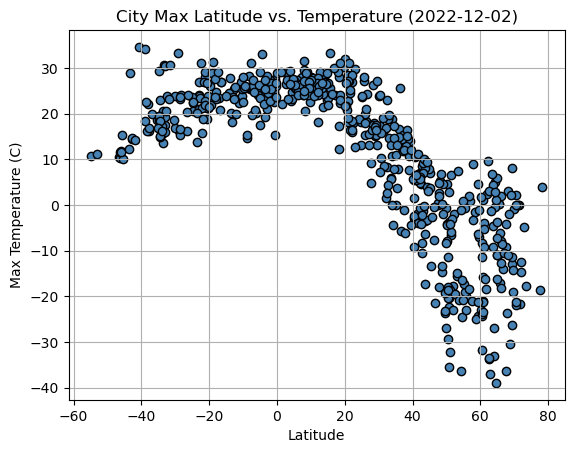

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = "steelblue", edgecolor ="black")
plt.grid()
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-12-02)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

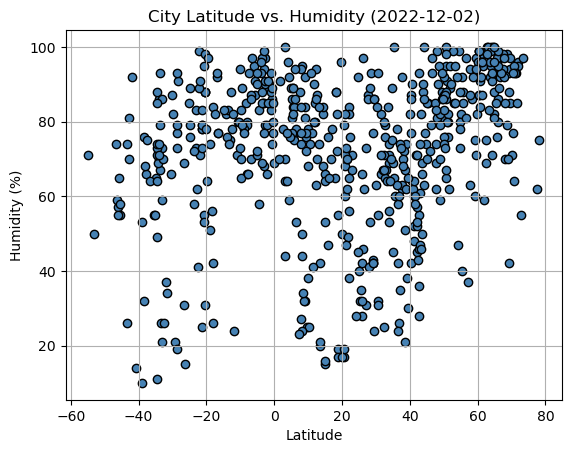

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = "steelblue", edgecolor = "black")
plt.grid()
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-12-02)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

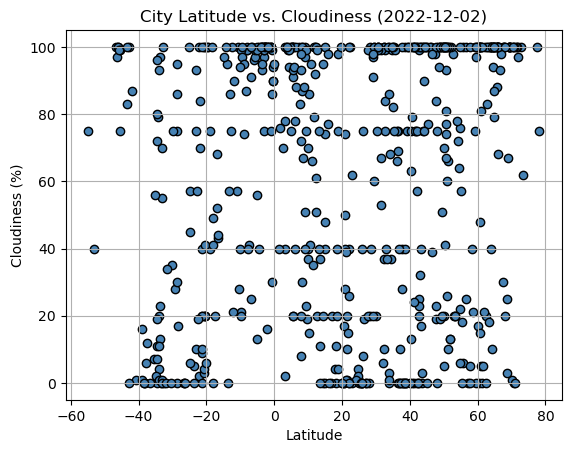

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")
plt.grid()

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-12-02)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

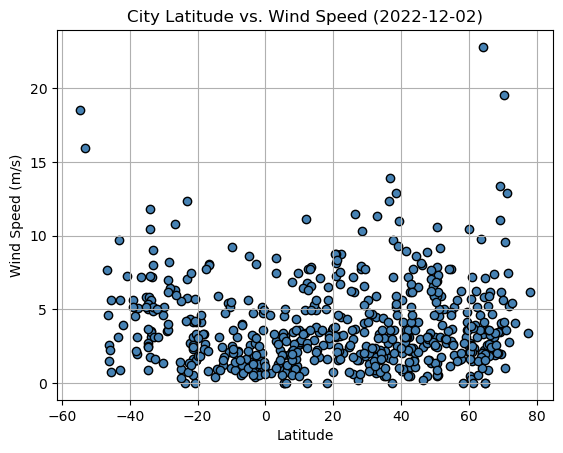

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.grid()

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-12-02)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [76]:
# Define a function to create Linear Regression plots
def regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    print(f"The r-value is : {rvalue}")
    regression_value = x*slope + intercept
    line = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regression_value, "r-")
    plt.annotate(line,(1,15),fontsize = 15, color="red")
    return regression_value

In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la palma,33.8464,-118.0467,18.73,69,100,1.54,US,1670015459
3,tanabe,33.7333,135.3667,5.95,71,0,1.65,JP,1670015461
4,pangnirtung,66.1451,-65.7125,-8.00,86,100,6.17,CA,1670015461
5,jamestown,42.0970,-79.2353,6.97,45,100,7.20,US,1670015184
6,champerico,14.3000,-91.9167,28.44,68,0,2.92,GT,1670015462


In [61]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,avarua,-21.2078,-159.7750,28.03,78,40,4.12,CK,1670015460
2,vaitape,-16.5167,-151.7500,26.86,77,43,8.05,PF,1670015460
8,busselton,-33.6500,115.3333,13.49,93,13,3.49,AU,1670015464
9,cape town,-33.9258,18.4232,16.86,70,93,1.79,ZA,1670015464
11,mayumba,-3.4320,10.6554,24.48,85,100,1.83,GA,1670015465


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : -0.8384532024901423


Text(0, 0.5, 'Max Temp')

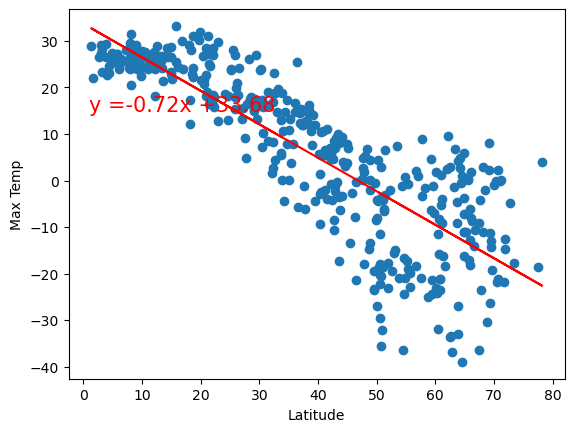

In [77]:
# Linear regression on Northern Hemisphere
n_temp = regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

The r-value is : 0.529996070588853


Text(0, 0.5, 'Max Temp')

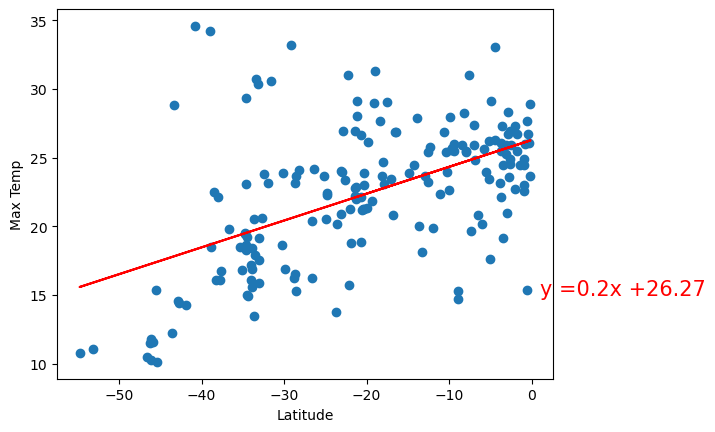

In [78]:
# Linear regression on Southern Hemisphere
s_temp = regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

**Discussion about the linear relationship:** The max temperature increasing toward equator in the both southern and northern hemispher.

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.37436027023097745


Text(0, 0.5, 'Humidity')

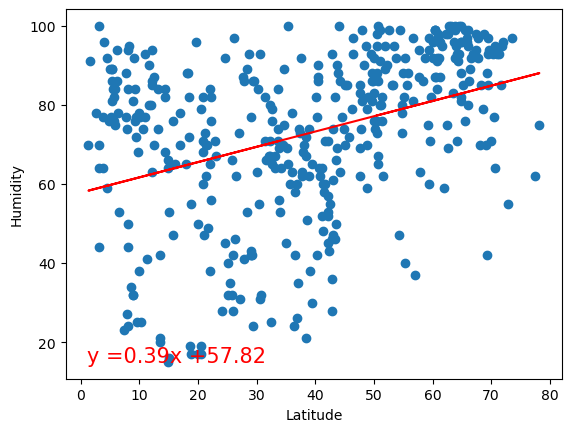

In [79]:
# Northern Hemisphere
n_humid = regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")

The r-value is : 0.43981465102405826


Text(0, 0.5, 'Humidity')

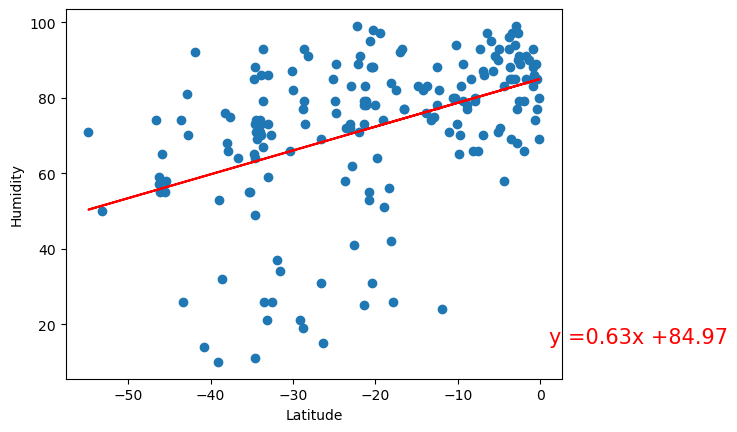

In [82]:
# Southern Hemisphere
s_humid = regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")

**Discussion about the linear relationship:** The humidity generally increase with the latitude in both southern and northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.14032613648974804


Text(0, 0.5, 'Cloudiness')

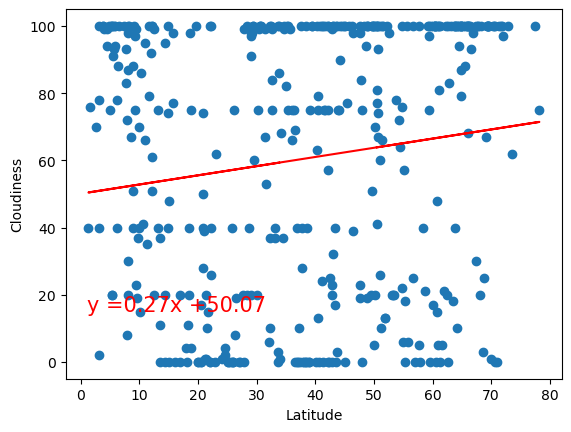

In [83]:
# Northern Hemisphere
n_cloud = regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

The r-value is : 0.4010746963210854


Text(0, 0.5, 'Cloudiness')

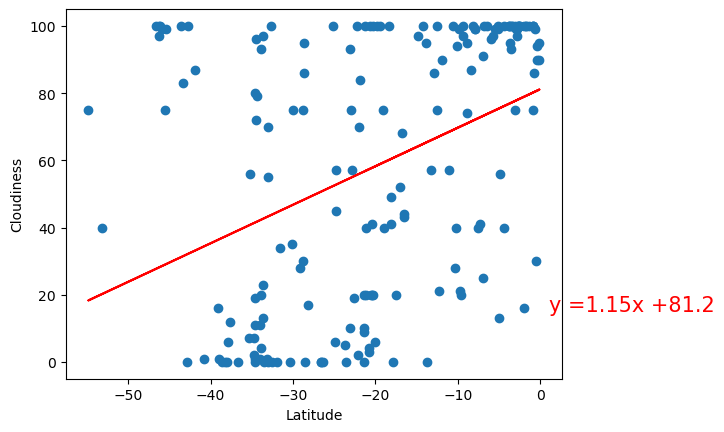

In [84]:
# Southern Hemisphere
s_cloud = regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

**Discussion about the linear relationship:** For northern hemisphere, there are weak relationship between cloudiness and latitude. For southern hemisphere, the higher the latitude the more cloudiness but the relation is weak either.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.12558587147855144


Text(0, 0.5, 'Wind Speed')

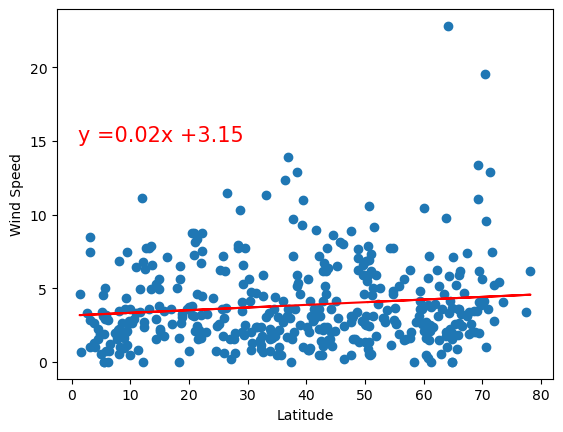

In [85]:
# Northern Hemisphere
n_wind = regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

The r-value is : -0.4332360520448851


Text(0, 0.5, 'Wind Speed')

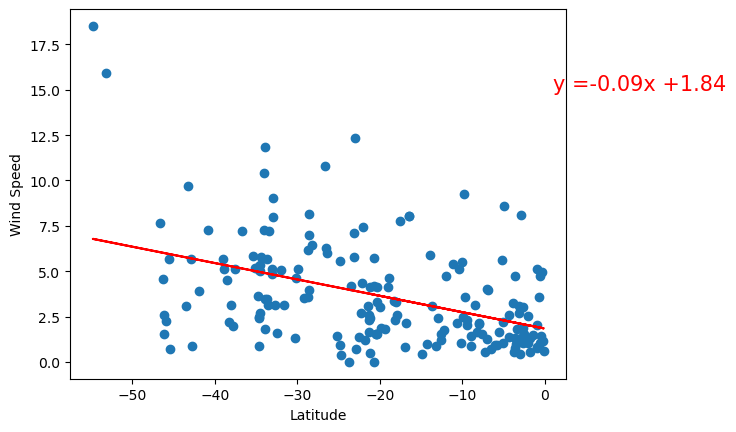

In [86]:
# Southern Hemisphere
s_wind = regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

**Discussion about the linear relationship:** In northern hemisphere, there is little relationship between wind speed and latitude. For southern hemisphere, the wind speed seems to be lower on lower latitude